In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import seaborn as sns

import plotly
import plotly.express as px
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, plot, iplot 

import cufflinks as cf

from sklearn.metrics import accuracy_score

In [3]:
pyo.init_notebook_mode(connected = True)
cf.go_offline()

In [4]:
df = pd.read_csv(r'C:\Users\ACER\Desktop\Works\Heart Disease Prediction\heart.csv')

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [8]:
df["target"]

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [9]:
df.groupby("target").size()

target
0    138
1    165
dtype: int64

In [11]:
df.shape

(303, 14)

In [12]:
df.size


4242

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Visualization

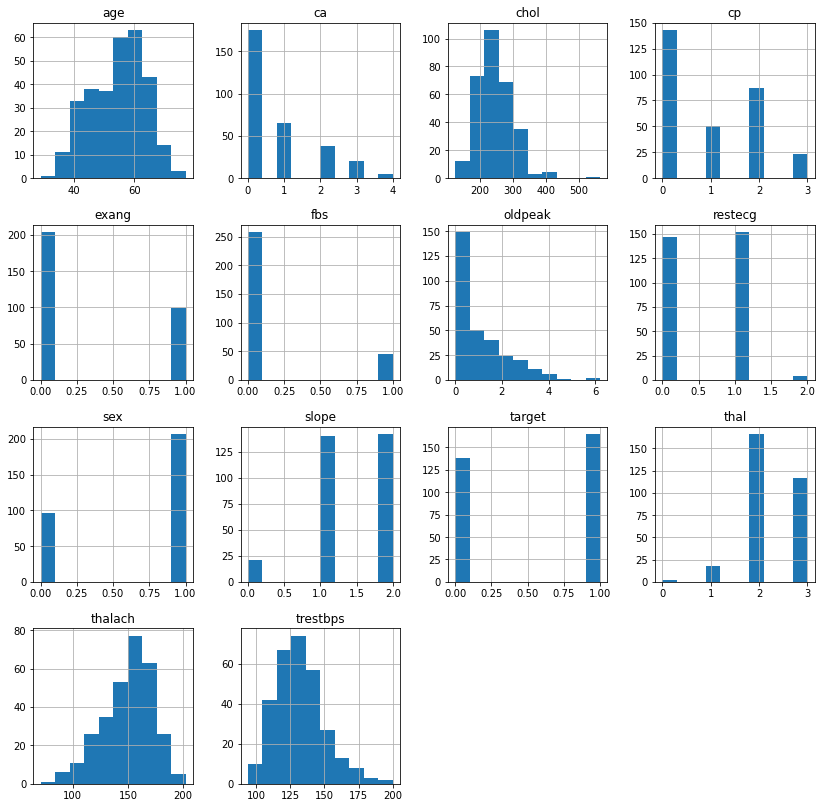

In [18]:
df.hist(figsize=(14,14))
plt.show()

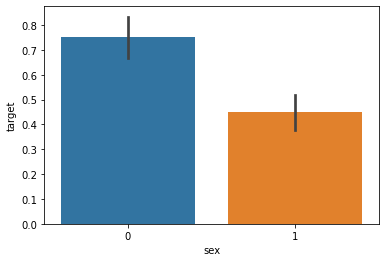

In [19]:
sns.barplot(df['sex'], df['target'])
plt.show()

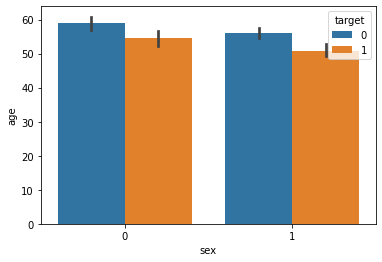

In [21]:
sns.barplot(df['sex'], df['age'], df['target'])
plt.show()

In [23]:
px.bar(df, df['sex'], df['target'])

In [24]:
numeric_coloumns = ['trestbps','chol', 'age', 'oldpeak', 'thalach']


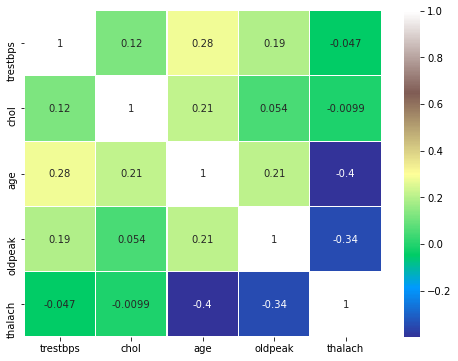

In [31]:
sns.heatmap(df[numeric_coloumns].corr(),annot=True,cmap='terrain',linewidths=0.1)
fig= plt.gcf()
fig.set_size_inches(8,6)
plt.show()


# Create 4 displots

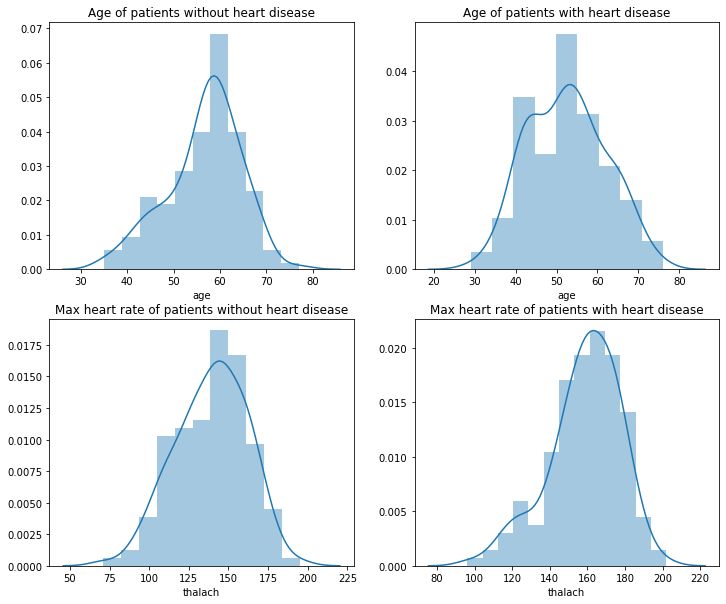

In [32]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['target']==0].age)
plt.title('Age of patients without heart disease')


plt.subplot(222)
sns.distplot(df[df['target']==1].age)
plt.title('Age of patients with heart disease')


plt.subplot(223)
sns.distplot(df[df['target']==0].thalach )
plt.title('Max heart rate of patients without heart disease')


plt.subplot(224)
sns.distplot(df[df['target']==1].thalach )
plt.title('Max heart rate of patients with heart disease')
plt.show()

# Preprocessing

In [33]:
x,y = df.loc[:,:'thal'],df['target']

In [140]:
x.drop('fbs',axis=1,inplace=True)

In [211]:
x.size

3636

In [35]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [213]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler().fit(x)
x_std = std.transform(x)

In [214]:
x_std

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=10,test_size=0.3, shuffle= True)

In [145]:
x_train

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
49,53,0,0,138,234,0,160,0,0.0,2,0,2
171,48,1,1,110,229,1,168,0,1.0,0,0,3
223,56,0,0,200,288,0,133,1,4.0,0,2,3
58,34,1,3,118,182,0,174,0,0.0,2,0,2
154,39,0,2,138,220,1,152,0,0.0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
156,47,1,2,130,253,1,179,0,0.0,2,0,2
123,54,0,2,108,267,0,167,0,0.0,2,0,2
15,50,0,2,120,219,1,158,0,1.6,1,0,2
125,34,0,1,118,210,1,192,0,0.7,2,0,2


In [146]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [147]:
prediction = dt.predict(x_test)



In [148]:
prediction

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0], dtype=int64)

In [149]:
accuracy_dt=accuracy_score(y_test,prediction)

In [150]:
accuracy_dt*100

75.82417582417582

In [151]:
dt.feature_importances_

array([0.0608366 , 0.04391232, 0.32392476, 0.10822571, 0.05479582,
       0.00971408, 0.07573333, 0.06667809, 0.07635117, 0.05635145,
       0.10975468, 0.01372198])

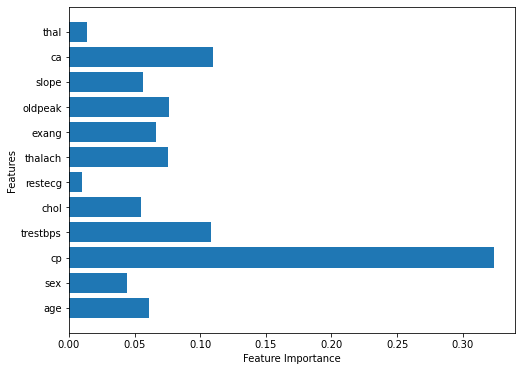

In [152]:
def plot_feature_importance(model):
    plt.figure(figsize=(8,6))
    n_features=12
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),x)
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)
    
    
plot_feature_importance(dt)

In [154]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [168]:
Category = ['No you dont have heart disease', 'Yes you have heart disease']

In [169]:
custom_data = np.array([[63,1,3,145,233,0,150,0,2.3,0,0,1]])

In [170]:
custom_predict = dt.predict(custom_data)

In [171]:
custom_predict

array([1], dtype=int64)

In [172]:
custom_data = np.array([[57,0,0,140,241,1,123,1,0.2,1,0,3]])

In [173]:
custom_predict = dt.predict(custom_data)
custom_predict

array([0], dtype=int64)

In [174]:
print(Category[int(custom_predict[0])])

No you dont have heart disease


In [175]:
#KNN Algorithm


In [202]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [203]:
predict_knn=knn.predict(x_test)

In [204]:
accuracy_knn = accuracy_score(y_test, predict_knn)

In [205]:
accuracy_knn*100

63.73626373626373

In [206]:
custom_data_knn = np.array([[63,1,3,145,233,0,150,0,2.3,0,0,1]])

In [208]:
custom_predict = knn.predict(custom_data_knn)

In [210]:
print(Category[int(custom_predict[0])])

Yes you have heart disease


In [215]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler().fit(x)
x_std = std.transform(x)

In [216]:
x_std

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [219]:
from sklearn.model_selection import train_test_split
x_train_std,x_test_std,y_train,y_test = train_test_split(x_std,y,random_state=10,test_size=0.3, shuffle= True)

In [221]:
x_train_std.shape

(212, 12)

In [222]:
x_test_std.shape

(91, 12)

In [223]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_std,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [224]:
predict_knn=knn.predict(x_test_std)

In [225]:
accuracy_knn = accuracy_score(y_test, predict_knn)
accuracy_knn*100

79.12087912087912

In [226]:
custom_data_knn = np.array([[63,1,3,145,233,0,150,0,2.3,0,0,1]])

In [227]:
custom_data_knn_std = std.transform(custom_data_knn)

In [228]:
custom_data_knn_std

array([[ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
        -1.00583187,  0.01544279, -0.69663055,  1.08733806, -2.27457861,
        -0.71442887, -2.14887271]])

In [229]:
custom_predict = knn.predict(custom_data_knn_std)
print(Category[int(custom_predict[0])])

Yes you have heart disease


In [235]:
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_std,y_train)
    prediction_knn=knn.predict(x_test_std)
    scores[k] = accuracy_score(y_test, prediction_knn)
    scores_list.append(accuracy_score(y_test, prediction_knn))

In [232]:
scores

{1: 0.7582417582417582,
 2: 0.8131868131868132,
 3: 0.7912087912087912,
 4: 0.8131868131868132,
 5: 0.7912087912087912,
 6: 0.8131868131868132,
 7: 0.7912087912087912,
 8: 0.8461538461538461,
 9: 0.8021978021978022,
 10: 0.8241758241758241,
 11: 0.7802197802197802,
 12: 0.8131868131868132,
 13: 0.8021978021978022,
 14: 0.8021978021978022,
 15: 0.7912087912087912,
 16: 0.7912087912087912,
 17: 0.7802197802197802,
 18: 0.7912087912087912,
 19: 0.7802197802197802,
 20: 0.7802197802197802,
 21: 0.7802197802197802,
 22: 0.7802197802197802,
 23: 0.7802197802197802,
 24: 0.7802197802197802,
 25: 0.7802197802197802}

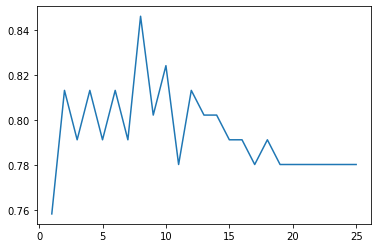

In [236]:
plt.plot(k_range, scores_list)

In [237]:
px.line(x=k_range, y=scores_list)

In [238]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train_std,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [239]:
predict_knn=knn.predict(x_test_std)
accuracy_knn = accuracy_score(y_test, predict_knn)
accuracy_knn*100

84.61538461538461

In [241]:
algorithms = ['Decision Tree', 'KNN']
scores = [accuracy_dt, accuracy_knn]

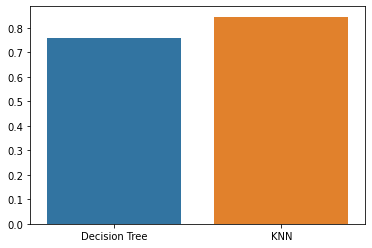

In [243]:
sns.barplot(algorithms, scores)